### TODO: import  this library to make connection to  postgres database

In [250]:
!pip install psycopg2-binary

In [251]:
import psycopg2

# run !pip install psycopg2 if your environment does not have this library

### TODO: Create a connection to the `rocket spark` database, get a cursor, and set autocommit to true

In [268]:
try: 
    conn = psycopg2.connect("host=54.175.254.25 dbname=rocket_spark user=data_analyst password=secret")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)
conn.set_session(autocommit=True)

### TODO : Run the cells below to confirm  if all tables exist and how many rows are available for each table

In [253]:
print("\nTable: songs\n")
try: 
    cur.execute("SELECT count(*) FROM songs;")
except psycopg2.Error as e: 
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()


Table: songs

(71,)


In [254]:
print("\nTable: songsplays\n")
try: 
    cur.execute("SELECT count(*) FROM songplays;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()


Table: songsplays

(1368,)


In [255]:
print("\n:Table artists\n")
try: 
    cur.execute("SELECT count(*) FROM artists;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()


:Table artists

(69,)


In [256]:
print("\nTable: users\n")
try: 
    cur.execute("SELECT count(*) FROM users;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()


Table: users

(90,)


In [257]:
print("\nTable: time\n")
try: 
    cur.execute("SELECT count(*) FROM time;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)


Table: time



In [258]:
row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()    

(4978,)


> #### Question 1: Find all `users` (first_name, last_name, gender and level) (song title) who have listened to the song  `Face the Ashes` in year 2018

In [259]:
import pandas as pd

In [260]:
# sql statement
users_2018 = "select u.first_name, u.last_name, u.gender, u.level, s.title \
from users u \
inner join songplays sp \
on u.user_id = sp.user_id::integer \
inner join songs s \
on sp.song_id = s.song_id \
where s.title = 'Face the Ashes'and s.year = 2018;" 
users_18 = pd.read_sql(users_2018,conn)
users_18

,first_name,last_name,gender,level,title


No user has listened to the song **Face the Ashes** in 2018, however without the condition 's.year = 2018', there are users that actually listened to the song

> #### Question 2:  Provide  top 100 most played songs  `songplays` (song title , location, artist name, duration, (column count for how many times it was played )

In [261]:
most_played = "select * \
from \
(select s.title, sp.location, a.name, s.duration,sum(sp.song_play_id) as total_count, row_number() over (partition by s.title order by sum(sp.song_play_id) desc) as song_count \
from songplays sp \
inner join songs s \
on sp.song_id = s.song_id \
inner join artists a \
on sp.artist_id = a.artist_id \
group by s.title, sp.location, a.name, s.duration \
HAVING sum(sp.song_play_id) > 0 \
) t \
where t.song_count <= 100;"

top_100 = pd.read_sql(most_played,conn)
top_100

,title,location,name,duration,total_count,song_count
0,A Higher Place (Album Version),"Lansing-East Lansing, MI",Tom Petty,236.17261,7258,1
1,A Higher Place (Album Version),"Portland-South Portland, ME",Tom Petty,236.17261,2617,2
2,A Higher Place (Album Version),"New York-Newark-Jersey City, NY-NJ-PA",Tom Petty,236.17261,1788,3
3,A Higher Place (Album Version),"Chicago-Naperville-Elgin, IL-IN-WI",Tom Petty,236.17261,1782,4
4,A Higher Place (Album Version),"Lubbock, TX",Tom Petty,236.17261,1356,5
...,...,...,...,...,...,...
688,¿Dónde va Chichi?,"Columbia, SC",Sierra Maestra,313.12934,303,9
689,¿Dónde va Chichi?,"Chicago-Naperville-Elgin, IL-IN-WI",Sierra Maestra,313.12934,190,10
690,¿Dónde va Chichi?,"Phoenix-Mesa-Scottsdale, AZ",Sierra Maestra,313.12934,172,11
691,¿Dónde va Chichi?,"Cedar Rapids, IA",Sierra Maestra,313.12934,50,12


> #### Question 3: By explorative data analysis find if there are gainful insights between `location` and `artists` and `song`  played

In [273]:
df = "select distinct(s.title), sp.location, a.name, sp.level, s.year, sum(sp.song_play_id) as song_count \
from songplays sp \
inner join songs s \
on sp.song_id = s.song_id \
inner join artists a \
on sp.artist_id = a.artist_id \
group by s.title, sp.location, a.name, sp.level, s.year \
order by song_count desc;" 

df1 = pd.read_sql(df,conn)
df1

,title,location,name,level,year,song_count
0,The Ballad Of Sleeping Beauty,"Chicago-Naperville-Elgin, IL-IN-WI",Sophie B. Hawkins,paid,1994,8886
1,Streets On Fire (Explicit Album Version),"Chicago-Naperville-Elgin, IL-IN-WI",Lupe Fiasco,paid,0,7337
2,A Higher Place (Album Version),"Lansing-East Lansing, MI",Tom Petty,paid,1994,7258
3,Native Soul,"Lansing-East Lansing, MI",Danilo Perez,paid,2003,6962
4,Got My Mojo Workin,"Chicago-Naperville-Elgin, IL-IN-WI",Pucho & His Latin Soul Brothers,paid,0,6956
...,...,...,...,...,...,...
708,Soul Deep,"Washington-Arlington-Alexandria, DC-VA-MD-WV",The Box Tops,free,1969,11
709,It Wont Be Christmas,"Phoenix-Mesa-Scottsdale, AZ",David Martin,free,0,6
710,City Slickers,"Phoenix-Mesa-Scottsdale, AZ",Marc Shaiman,free,2008,5
711,The Ballad Of Sleeping Beauty,"Phoenix-Mesa-Scottsdale, AZ",Sophie B. Hawkins,free,1994,4


In [234]:
df1.describe()

,song_count
count,713.000000
mean,1229.364656
std,1270.999005
min,1.000000
25%,512.000000
50%,918.000000
75%,1344.000000
max,8886.000000


The average song count in the dataset is 1264 with the highest song count being 8886 by Sophie B. Hawkins in Chicago-Naperville-Elgin, IL-IN-WI

Text(0.5, 1.0, 'Top 10 artists')

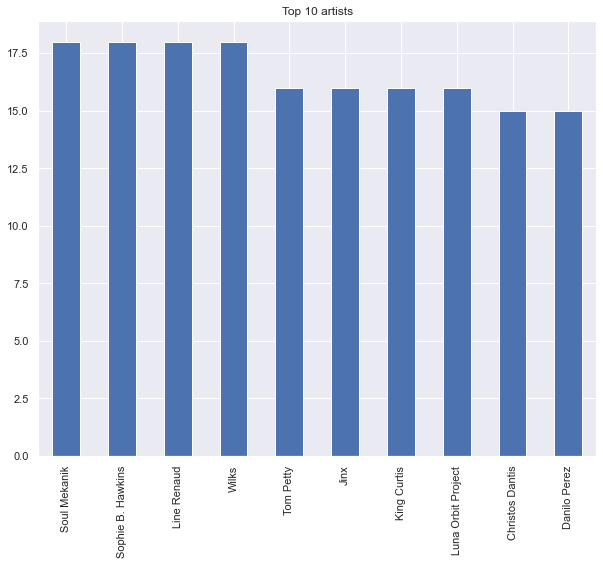

In [277]:
#top 10 artists
artist_10 = df1.name.value_counts()[:10]
artist_10.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 artists')

Line Renaud and Wilks have the most songs

Text(0.5, 1.0, 'Top 10 songs')

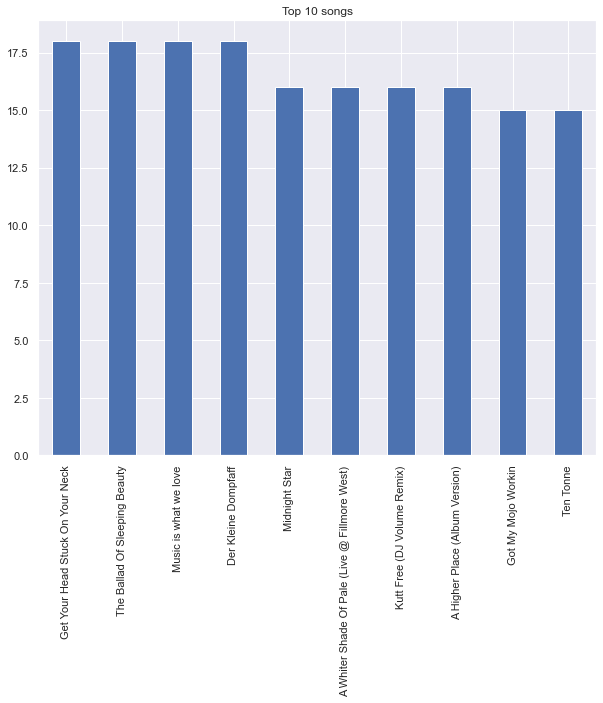

In [276]:
#top 10 songs
song_10 = df1.title.value_counts()[:10]
song_10.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 songs')

The most listened to songs are Der Kleine Dompfaff​ and Music is what we love 

Text(0.5, 1.0, 'Top 10 locations')

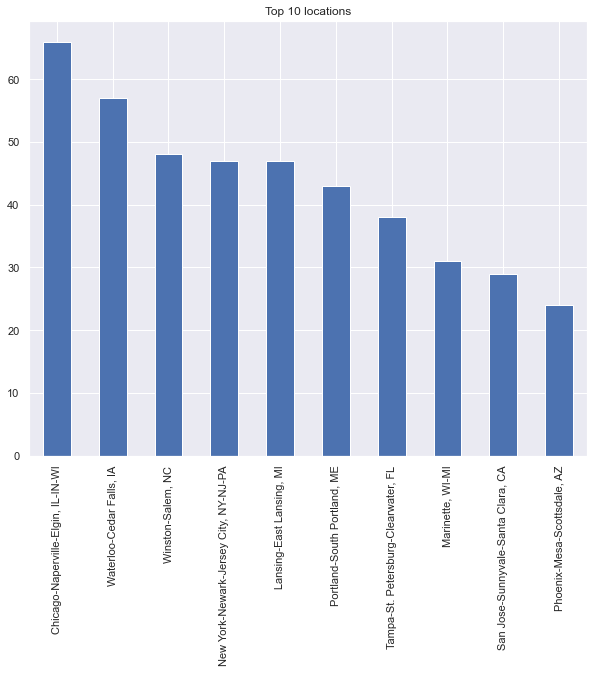

In [275]:
#top 10 locations
top_10 = df1.location.value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 locations')

> #### Question 4: Using the `song_plays` table, write an SQL query to find the record which is the fourth most listened song.

In [238]:
most_listened = "select song_id, \
DENSE_RANK() OVER (partition by song_id order by song_play_id desc) as song_rank \
from songplays;" 

fourth_most = pd.read_sql(most_listened,conn)
fourth_most


,song_id,song_rank
0,SOAOIBZ12AB01815BE,1
1,SOAOIBZ12AB01815BE,2
2,SOAOIBZ12AB01815BE,3
3,SOAOIBZ12AB01815BE,4
4,SOAOIBZ12AB01815BE,5
...,...,...
1363,None,136
1364,None,137
1365,None,138
1366,None,139


> #### Question 5: Based on your analysis derive to what extent is there correlation between `songplays` and `users`level(free , paid )

In [242]:
df1[['level','song_count']].groupby('level').mean()


,song_count
level,
free,706.400000
paid,1643.268844


In [240]:
df1.head()

,title,location,name,level,song_count
0,The Ballad Of Sleeping Beauty,"Chicago-Naperville-Elgin, IL-IN-WI",Sophie B. Hawkins,paid,8886
1,Streets On Fire (Explicit Album Version),"Chicago-Naperville-Elgin, IL-IN-WI",Lupe Fiasco,paid,7337
2,A Higher Place (Album Version),"Lansing-East Lansing, MI",Tom Petty,paid,7258
3,Native Soul,"Lansing-East Lansing, MI",Danilo Perez,paid,6962
4,Got My Mojo Workin,"Chicago-Naperville-Elgin, IL-IN-WI",Pucho & His Latin Soul Brothers,paid,6956


<AxesSubplot:ylabel='level-None'>

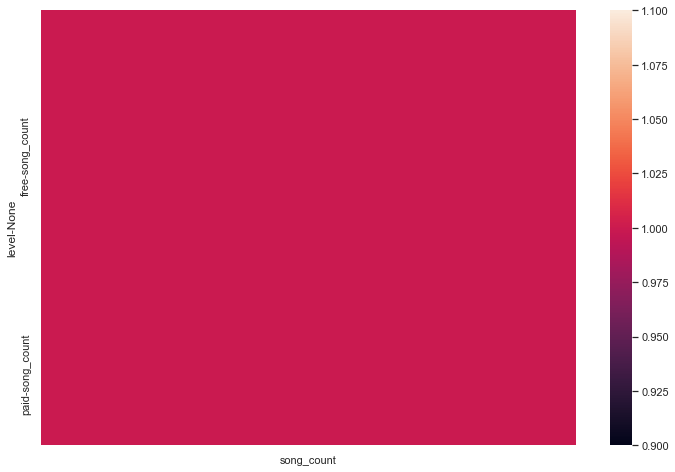

In [248]:
corr = df1[['level', 'song_count']].groupby('level').corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr)

### Close Connection 


In [ ]:
cur.close()
conn.close()